In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

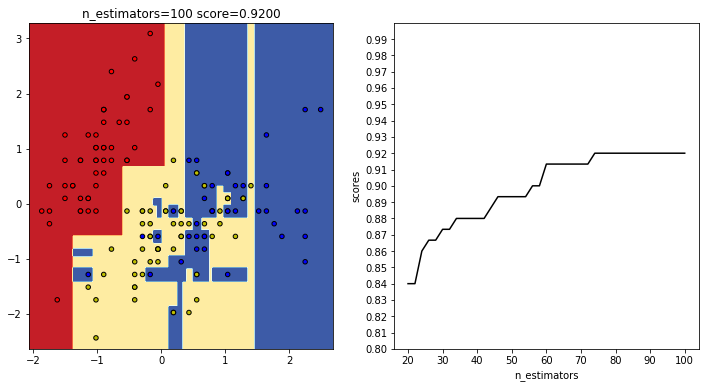

In [2]:
pair = [0, 1]
RANDOM_SEED = 13
plot_step = 0.02

# load iris dataset
iris = load_iris()

X_train = iris.data[:, pair]
y_train = iris.target

# Shuffle
idx = np.arange(X_train.shape[0])
np.random.seed(RANDOM_SEED)
np.random.shuffle(idx)
X_train = X_train[idx]
y_train = y_train[idx]

# Standardize
X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)

# Plot
plt.figure(figsize=(6 * 2, 6))

x_min = X_train[:, 0].min() - .2
x_max = X_train[:, 0].max() + .2
y_min = X_train[:, 1].min() - .2
y_max = X_train[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

n_estimators = np.arange(20, 101, 2, dtype=np.int)
scores = np.zeros(n_estimators.shape[0])
model = None

for i, n_est in enumerate(n_estimators):
    # Train and score
    model = GradientBoostingClassifier(n_estimators=n_est, learning_rate=0.1, loss='deviance')
    model.fit(X_train, y_train)
    scores[i] = model.score(X_train, y_train)

plt.subplot(1, 2, 1, title='n_estimators=100 score=%.4f' % scores[-1])
z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, cmap=plt.cm.RdYlBu)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=ListedColormap(['r', 'y', 'b']), edgecolor='k', s=20)

plt.subplot(1, 2, 2, ylim=(0.8, 1.), yticks=np.arange(0.8, 1., 0.01), xlabel='n_estimators', ylabel='scores')
plt.plot(n_estimators, scores, 'k-')

plt.show()